# Project - Stock Price Prediction Model

In this machine learning project, we will be talking about predicting the returns on stocks. This is a very complex task and has uncertainties. We will develop this project into two parts: First, we will learn how to predict stock price using the LSTM neural network. Then we will build a dashboard using Plotly dash for stock analysis.

In [72]:
#Importing the Dependencies

In [73]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [76]:
from datetime import datetime
import datetime as dt
start = dt.datetime(2002,1,1)
end = dt.datetime(2022,1,1)

In [77]:
#Data Collection & Processing

In [78]:
## Importing Dataset ##
Tata_df = data.DataReader("TATACONSUM.NS",'yahoo',start,end)
#Tata_df = pd.read_csv(r"D:\NSE-Tata-Global-Beverages-Limited\TATACONSUM.NS.csv")

In [79]:
# getting some statistical measures about the data
Tata_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4976.000000,4976.000000,4976.000000,4976.000000,4.976000e+03,4976.000000
mean,161.432124,156.452106,159.031362,158.800569,2.303616e+06,147.401409
std,165.420641,161.315284,163.517969,163.308458,2.481842e+06,166.307779
min,14.950000,14.090000,14.090000,14.765000,0.000000e+00,10.403298
25%,73.352501,71.010002,72.359999,72.118752,9.801730e+05,56.375368
50%,116.000000,112.000000,113.850002,114.075001,1.656440e+06,97.894199
75%,162.399994,157.250000,159.724998,159.449997,2.831626e+06,144.234821
max,889.000000,877.599976,885.000000,882.099976,6.355124e+07,882.099976


In [80]:
# printing the first 5 rows of the dataframe
Tata_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-01-01,17.500000,16.799999,17.350000,16.905001,722730.0,11.417471
2002-01-02,17.184999,16.799999,17.000000,16.850000,290270.0,11.380325
2002-01-03,17.200001,16.870001,16.955000,17.059999,360580.0,11.522158
2002-01-04,17.299999,16.809999,17.270000,16.955000,682690.0,11.451241
2002-01-07,17.750000,17.049999,17.200001,17.400000,840670.0,11.751790


In [81]:
# printing the last 5 rows of the dataframe
Tata_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,724.500000,706.750000,710.000000,718.500000,691930.0,718.500000
2021-12-28,729.549988,719.400024,722.299988,726.950012,819253.0,726.950012
2021-12-29,728.900024,720.000000,728.000000,726.650024,783940.0,726.650024
2021-12-30,737.849976,725.299988,729.000000,728.000000,2230935.0,728.000000
2021-12-31,745.000000,729.049988,730.000000,743.450012,865277.0,743.450012


In [82]:
#Handling the Missing values

In [83]:
## Checking for null values ##
Tata_df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [84]:
# drop the null values from the dataframe
Tata_df = Tata_df.dropna()

In [14]:
(Tata_df['Volume'] == 0).sum()

32

In [15]:
Tata_df['Volume'] = Tata_df ['Volume'].replace({0:np.nan})

In [85]:
Tata_df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [17]:
Tata_df = Tata_df.dropna()

In [86]:
Tata_df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [87]:
# getting some informations about the data
Tata_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4976 entries, 2002-01-01 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4976 non-null   float64
 1   Low        4976 non-null   float64
 2   Open       4976 non-null   float64
 3   Close      4976 non-null   float64
 4   Volume     4976 non-null   float64
 5   Adj Close  4976 non-null   float64
dtypes: float64(6)
memory usage: 272.1 KB


### Data Visualization

In [89]:
## Analysing the key attributes of our dataset ##

In [91]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 
#Cufflink is also a python library that connects plotly with pandas so that we can create charts directly on data frames.
import cufflinks as cf
#In order to display the plot inside the notebook, you need to initiate plotly’s notebook mode as follows 
init_notebook_mode(connected=True)
cf.go_offline()

In [92]:
Tata_df['Close'].iplot(kind = 'line',title = 'Close Price History')

In [93]:
Tata_df['Volume'].iplot(kind = 'line',title = 'Volume History')


In [94]:
Tata_df["Open"].iplot(kind = 'line',title = 'Open Price History')

In [95]:
# Caculating the Moving Average of our Dataset ##

In [96]:
ma_day = [50, 100, 200]

for ma in ma_day:
    
        column_name = f"MA for {ma} days"
        Tata_df[column_name] = Tata_df['Adj Close'].rolling(ma).mean()

In [97]:
print(Tata_df)

                  High         Low        Open       Close     Volume  \
Date                                                                    
2002-01-01   17.500000   16.799999   17.350000   16.905001   722730.0   
2002-01-02   17.184999   16.799999   17.000000   16.850000   290270.0   
2002-01-03   17.200001   16.870001   16.955000   17.059999   360580.0   
2002-01-04   17.299999   16.809999   17.270000   16.955000   682690.0   
2002-01-07   17.750000   17.049999   17.200001   17.400000   840670.0   
...                ...         ...         ...         ...        ...   
2021-12-27  724.500000  706.750000  710.000000  718.500000   691930.0   
2021-12-28  729.549988  719.400024  722.299988  726.950012   819253.0   
2021-12-29  728.900024  720.000000  728.000000  726.650024   783940.0   
2021-12-30  737.849976  725.299988  729.000000  728.000000  2230935.0   
2021-12-31  745.000000  729.049988  730.000000  743.450012   865277.0   

             Adj Close  MA for 50 days  MA for 100

In [98]:
## PLotting the Moving Average ##

In [99]:
Tata_df[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].iplot(kind = 'line',title = 'Tata Consumer Products Ltd')

In [100]:
Tata_df.shape

(4976, 9)

In [101]:
## Calculating Daily Return of the Stock on Average(Using Pandas) ##

In [102]:
Tata_df['Daily Return'] = Tata_df['Adj Close'].pct_change()

In [103]:
#fig.set_figheight(8)
#fig.set_figwidth(15)
#Tata_df['Daily Return'].plot(legend=True, linestyle='--', marker='o').set_title('Tata Consumer Products Ltd')

Tata_df[['Daily Return']].iplot(legend = True, kind = 'line',title = 'Tata Consumer Products Ltd')


In [104]:
## Overall look at the average daily return using a histogram.(Using seaborn) ##

Text(0.5, 1.0, 'Tata Consumer Products Ltd')

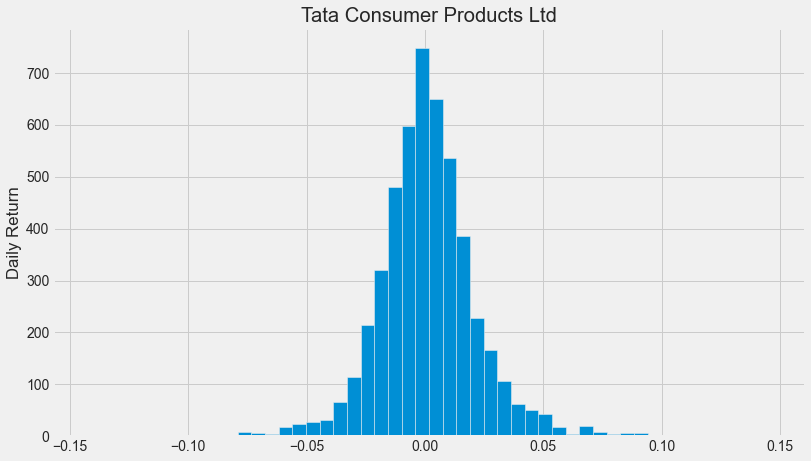

In [105]:
plt.figure(figsize=(12, 7))
Tata_df['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title('Tata Consumer Products Ltd')

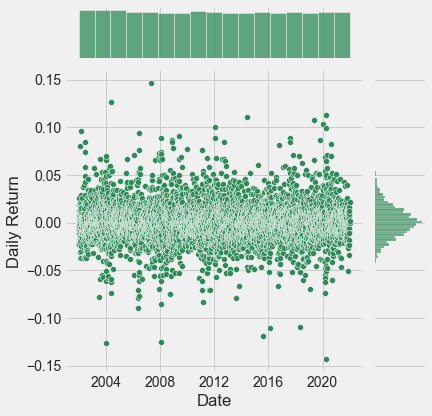

In [106]:
sns.jointplot(data=Tata_df['Daily Return'], kind='scatter', color='seagreen')

In [107]:
#From above figure we can assume that the daily return follows Random Walk Theory

In [108]:
#Dividing training and testing data in 70:30 

In [109]:
data_training = pd.DataFrame(Tata_df['Adj Close'][0:int(len(Tata_df)*0.70)])
data_testing = pd.DataFrame(Tata_df['Adj Close'][int(len(Tata_df)*0.70): int(len(Tata_df))])

In [110]:
print(data_training.shape)
print(data_testing.shape)

(3483, 1)
(1493, 1)


In [111]:
#Normalizing the training dataset using MinMaxScaler(the MinMaxScaler estimator will fit on the training dataset and the same estimator will be used to transform both training and the test dataset)

In [112]:
Scaler = MinMaxScaler(feature_range = (0,1))

In [113]:
data_training_array = Scaler.fit_transform(data_training)
data_training_array

array([[0.00689047],
       [0.00663809],
       [0.00760173],
       ...,
       [0.76523865],
       [0.77245569],
       [0.76931784]])

In [114]:
data_training_array.shape

(3483, 1)

In [115]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [116]:
x_train.shape

(3383, 100, 1)

In [117]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'sigmoid', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'sigmoid', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'sigmoid', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [118]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [119]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50
106/106 [==============================] - 13s 98ms/step - loss: 0.1820
Epoch 2/50
106/106 [==============================] - 10s 98ms/step - loss: 0.0931
Epoch 3/50
106/106 [==============================] - 11s 101ms/step - loss: 0.0846
Epoch 4/50
106/106 [==============================] - 11s 106ms/step - loss: 0.0830
Epoch 5/50
106/106 [==============================] - 11s 107ms/step - loss: 0.0827
Epoch 6/50
106/106 [==============================] - 11s 107ms/step - loss: 0.0811
Epoch 7/50
106/106 [==============================] - 11s 107ms/step - loss: 0.0811
Epoch 8/50
106/106 [==============================] - 14s 128ms/step - loss: 0.0819
Epoch 9/50
106/106 [==============================] - 14s 130ms/step - loss: 0.0794
Epoch 10/50
106/106 [==============================] - 14s 130ms/step - loss: 0.0690
Epoch 11/50
106/106 [==============================] - 14s 129ms/step - loss: 0.0386
Epoch 12/50
106/106 [==============================] - 14s 130ms/step - loss

In [120]:
model.save("saved_model.h5")

In [121]:
data_testing.head()

,Adj Close
Date,
2015-12-16,126.129242
2015-12-17,131.348068
2015-12-18,131.070969
2015-12-21,131.994614
2015-12-22,130.424362


In [122]:
data_training.tail(100)

,Adj Close
Date,
2015-07-20,128.807632
2015-07-21,124.945702
2015-07-22,126.763077
2015-07-23,127.989807
2015-07-24,127.944382
...,...
2015-12-09,122.065018
2015-12-10,124.974625
2015-12-11,123.034882


In [123]:
past_100_days = data_training.tail(100)

In [124]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [125]:
final_df.head()

,Adj Close
0,128.807632
1,124.945702
2,126.763077
3,127.989807
4,127.944382


In [126]:
input_data = Scaler.fit_transform(final_df)

In [127]:
input_data

array([[0.04317545],
       [0.03827006],
       [0.04057847],
       ...,
       [0.802549  ],
       [0.80426372],
       [0.82388818]])

In [128]:
input_data.shape

(1593, 1)

In [129]:
x_test = []
y_test = []

In [130]:
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [131]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1493, 100, 1)
(1493,)


In [132]:
#Predictions

In [133]:
y_predicted = model.predict(x_test)

In [134]:
y_predicted.shape

(1493, 1)

In [135]:
y_test

array([0.03977338, 0.04640229, 0.04605032, ..., 0.802549  , 0.80426372,
       0.82388818])

In [136]:
y_predicted

array([[0.07204613],
       [0.07204875],
       [0.07205945],
       ...,
       [0.81320095],
       [0.81107134],
       [0.8094492 ]], dtype=float32)

In [137]:
Scaler.scale_

array([0.00127019])

In [138]:
scale_factor = 1/0.00127019
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

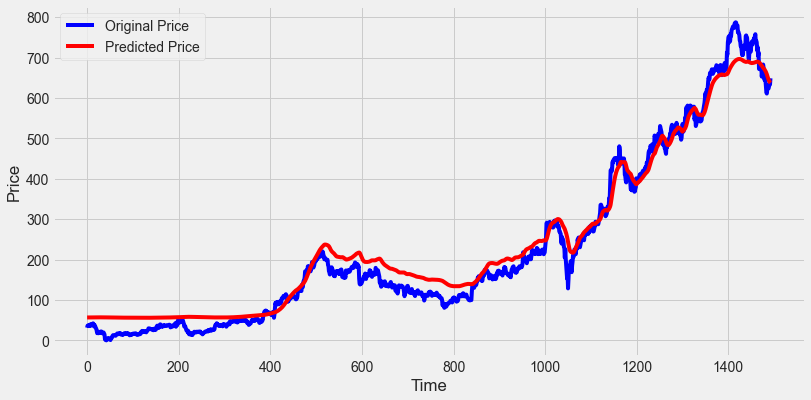

In [139]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()